# Codon models

Sometimes we may not be able to differentiate between the function or fitnesses of different codons encoding the same aminoacid, but still want to take into account the connectivity at the nucleotide level for visualizing the landscape as in a codon model of evolution.

The following table contains the fitnesses associated to each of the 20 aminoacids

In [22]:
# Import required libraries
from os.path import join

import pandas as pd
import numpy as np
import gpmap.src.plot as plot

from gpmap.src.space import SequenceSpace
from gpmap.src.randwalk import WMWSWalk
from gpmap.src.settings import TEST_DATA_DIR
from gpmap.src.seq import translate_seqs

## 1. Serine landscape

We can start by simply using the protein data to define a protein space, in this case for sequences of length 1

In [2]:
fpath = join(TEST_DATA_DIR, 'serine.protein.csv')
protein_data = pd.read_csv(fpath, index_col=0)
protein_data

,function
protein,
A,1
C,1
D,1
E,1
F,1
G,1
H,1
I,1
K,1


In [3]:
protein_space = SequenceSpace(X=protein_data.index.values, y=protein_data['function'].values)
print(protein_space)

Sequence Space:
	Type: protein
	Sequence length: 1
	Number of alleles per site: [20]
	Genotypes: [A,C,D,...,V,W,Y]
	Function y: [1,1,1,...,1,1,1]


Then, we can simply create the nucleotide space from this protein space with the `to_nucleotide_space` method, which naturally requires the space to be a protein space. By default, it associates the minimal function `y` to all of the sequences containing stop codons generated, but we can also specify a different value with the argument `y_stop`

In [4]:
nc_space = protein_space.to_nucleotide_space(codon_table='Standard', stop_y=0)
print(nc_space)

Sequence Space:
	Type: dna
	Sequence length: 3
	Number of alleles per site: [4, 4, 4]
	Genotypes: [AAA,AAC,AAG,...,TTC,TTG,TTT]
	Function y: [1.00,1.00,1.00,...,1.00,1.00,1.00]


After making sure that the new space contains the encoding nucleotide sequences and the corresponding function associated to the encoded protein sequence, we can generate the visualization as before

In [12]:
rw = WMWSWalk(space)
rw.calc_visualization(mean_function=1.5)

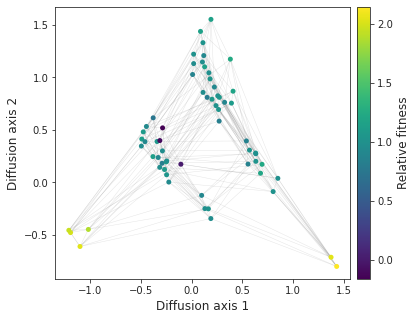

In [14]:
fig, axes = plot.init_fig(1, 1, colsize=6, rowsize=5)
plot.plot_visualization(axes, rw.nodes_df, edges_df=rw.space.get_edges_df(), x='1', y='2',
                        nodes_color='function', nodes_cmap_label='Relative fitness',
                        nodes_size=25, edges_alpha=0.2)

### Using CodonSpace class

We also provide a more generic CodonSpace class that does this operation for us so that we only need to provide the aminoacid(s) are are going to be under selection, enabling also to visualizing the structure of the landscape corresponding to aminoacids with certain properties

In [5]:
from gpmap.src.space import CodonSpace

In [6]:
space = CodonSpace(allowed_aminoacids=['S'], codon_table='Standard', add_variation=True, seed=0)
print(space)

Sequence Space:
	Type: dna
	Sequence length: 3
	Number of alleles per site: [4, 4, 4]
	Genotypes: [AAA,AAC,AAG,...,TTC,TTG,TTT]
	Function y: [1.18,1.04,1.10,...,0.96,0.92,0.83]


Note that we could also test how these landscapes would change under different genetic codes other than the standard. We use biopython module to translate the nucleotide sequence into protein sequence using [NCBI reference](https://www.ncbi.nlm.nih.gov/Taxonomy/Utils/wprintgc.cgi) for different codon tables or genetic codes


### Other codon landscapes

Thus, this class allows us to easily explore other basic codon landscapes by taking a certain category of aminoacids and seeing the generated structure. Lets say we are interested in non-aromatic hydrophobic aminoacids: A, V, I, L, M

In [25]:
space = CodonSpace(allowed_aminoacids=['A', 'V', 'I', 'L', 'M'],
                   codon_table='Standard', add_variation=True, seed=0)
print(space)

Sequence Space:
	Type: dna
	Sequence length: 3
	Number of alleles per site: [4, 4, 4]
	Genotypes: [AAA,AAC,AAG,...,TTC,TTG,TTT]
	Function y: [1.18,1.04,1.10,...,0.96,1.92,0.83]


In [30]:
rw = WMWSWalk(space)

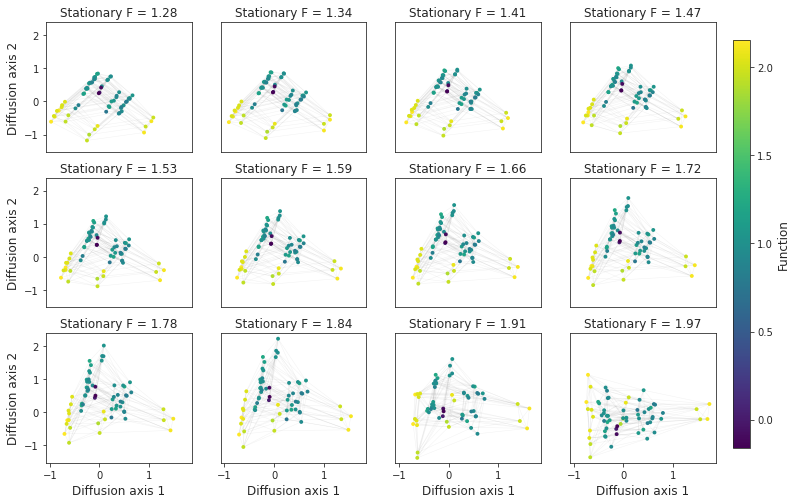

In [35]:
plot.figure_Ns_grid(rw, nodes_size=15)

In [36]:
rw.calc_visualization(mean_function=1.97)
nodes_df, edges_df = rw.nodes_df, rw.space.get_edges_df()
nodes_df['protein'] = translate_seqs(nodes_df.index)

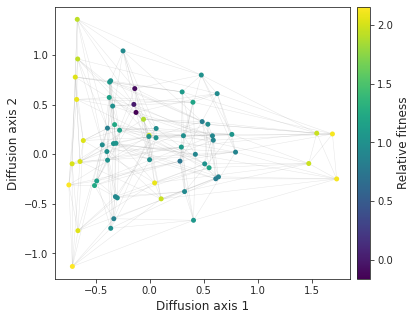

In [37]:
fig, axes = plot.init_fig(1, 1, colsize=6, rowsize=5)
plot.plot_visualization(axes, nodes_df, edges_df=edges_df, x='1', y='2',
                        nodes_color='function', nodes_cmap_label='Relative fitness',
                        nodes_size=25, edges_alpha=0.2)

In [41]:
plot.plot_interactive(nodes_df, edges_df=edges_df, text=nodes_df['protein'], nodes_size=8)

We can see that diffusion axis 1 separates mainly codons encoding A from those encoding L,I and M, which are isolated by the genetic code, and only connected through V. Interestingly, diffusion axis 2 sorts L, I and M in a very particular way from top to bottom: we have the set of 2 codons encoding for L followed by the set of 4 codons encoding for I and M, followed now by the set of 4 codons encoding for L. However, as these are all equally connected to each other, it is likely that the ordering is driven by the random variability in fitness that we introduced to be able to separate genotypes better

Lets look at the polar aminoacids now:

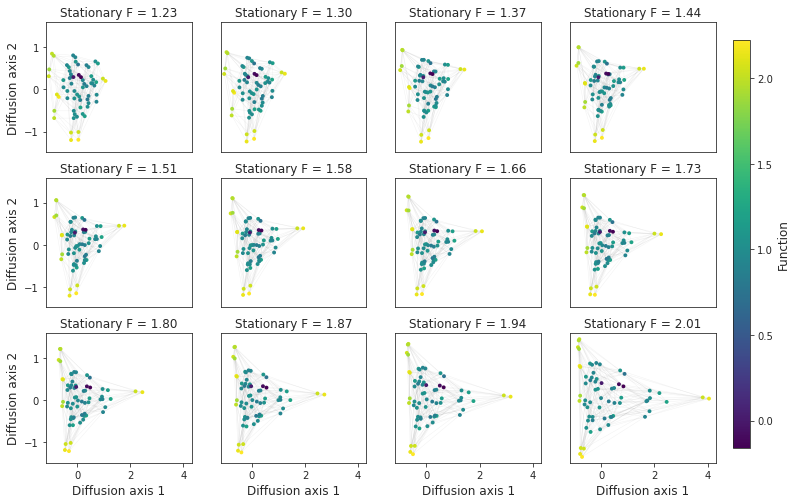

In [43]:
space = CodonSpace(allowed_aminoacids=['S', 'T', 'N', 'Q'],
                   codon_table='Standard', add_variation=True, seed=0)
rw = WMWSWalk(space)
plot.figure_Ns_grid(rw, nodes_size=15)

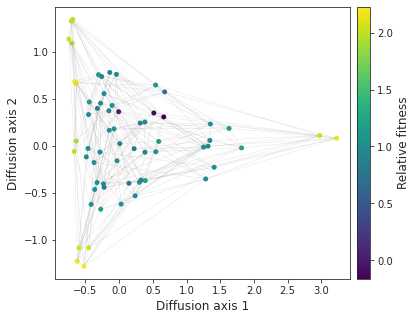

In [44]:
rw.calc_visualization(mean_function=1.95)
nodes_df, edges_df = rw.nodes_df, rw.space.get_edges_df()
nodes_df['protein'] = translate_seqs(nodes_df.index)
fig, axes = plot.init_fig(1, 1, colsize=6, rowsize=5)
plot.plot_visualization(axes, nodes_df, edges_df=edges_df, x='1', y='2',
                        nodes_color='function', nodes_cmap_label='Relative fitness',
                        nodes_size=25, edges_alpha=0.2)

In [45]:
plot.plot_interactive(nodes_df, edges_df=edges_df, text=nodes_df['protein'], nodes_size=8)

## 2. GB1 landscape

First, to reduce the computational complexity, we are going to use a reduced set of genotypes at the protein sequence to accelerate calculations. Previous results and visualizations suggests that the first two sites are fairly neutral. Thus, we are going to generate a modified landscape by marginalizing or averaging out the first position

In [7]:
data = pd.read_csv('../data/gb1.data.csv', index_col=0)
data['genotype'] = [x[1:] for x in data.index]
df = data.groupby(['genotype'])[['log_binding']].mean()
df.head()

,log_binding
genotype,
AAA,-0.391702
AAC,-2.399389
AAD,-3.465397
AAE,-5.470245
AAF,-4.395685


In [10]:
prot_space = SequenceSpace(X=df.index.values, y=df['log_binding'].values)
nc_space = prot_space.to_nucleotide_space(codon_table='Standard')
print(nc_space)

Sequence Space:
	Type: dna
	Sequence length: 9
	Number of alleles per site: [4, 4, 4, 4, 4, 4, 4, 4, 4]
	Genotypes: [AAAAAAAAA,AAAAAAAAC,AAAAAAAAG,...,TTTTTTTTC,TTTTTTTTG,TTTTTTTTT]
	Function y: [-4.94,-5.13,-4.94,...,-5.07,-5.01,-5.07]


In [11]:
rw = WMWSWalk(nc_space)
rw.calc_visualization(mean_function=0)
nodes_df, edges_df = rw.nodes_df, rw.space.get_edges_df()
nodes_df.head()

,1,2,3,4,5,6,7,8,9,function,stationary_freq
AAAAAAAAA,0.019845,0.061284,0.612032,1.398160,0.160789,-0.059745,0.078979,0.010121,0.825808,-4.941409,1.042677e-08
AAAAAAAAC,-0.057473,0.113341,0.619543,1.077611,0.322169,-0.051603,-0.023531,0.080891,0.819785,-5.130759,7.199279e-09
AAAAAAAAG,0.076650,0.025981,0.606098,1.377560,0.125654,-0.058351,0.163005,-0.035115,0.859129,-4.941409,1.042677e-08
AAAAAAAAT,-0.057473,0.113341,0.619543,1.077611,0.322169,-0.051603,-0.023531,0.080891,0.819785,-5.130759,7.199279e-09
AAAAAAACA,-0.381469,0.320710,0.458000,2.003884,0.123789,-0.025712,0.040680,-0.262473,0.527320,-5.222864,6.012311e-09


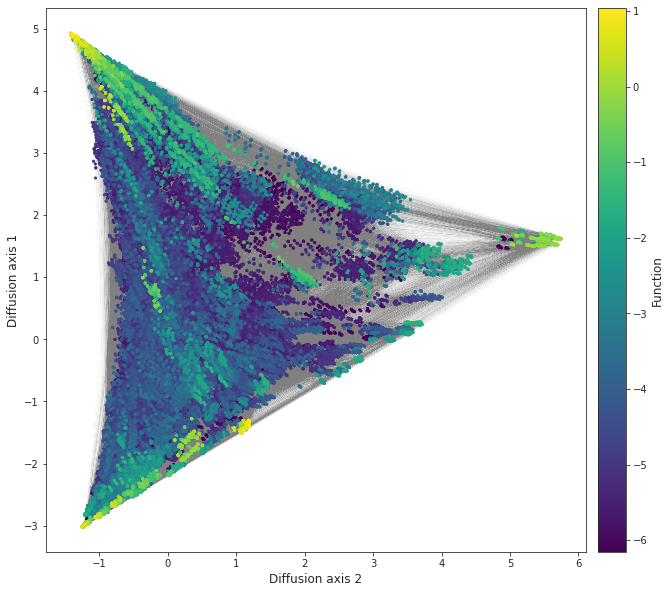

In [9]:
fig, axes = plot.init_fig(1, 1, figsize=(11, 10))
plot.plot_visualization(axes, nodes_df, edges_df=edges_df,
                        edges_alpha=0.005, ascending=True,
                        nodes_size=10, x='2', y='1')

## 3. ParD2-ParE2 landscape